### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# Deployment del Proyecto

In [135]:
import numpy as np
import joblib
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
from scipy import stats

In [136]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

## Carga de Archivos PKL

In [5]:
joblib_model_tree = joblib.load("joblib_model_tree.pkl")
joblib_model_VSM = joblib.load("joblib_model_VSM.pkl")
joblib_model_bayes1 = joblib.load("joblib_model_bayes1.pkl")
joblib_model_bayes0 = joblib.load("joblib_model_bayes0.pkl")
joblib_model_RL = joblib.load("joblib_model_RL.pkl")

## Creación de Función

In [262]:
def deployment(observacion, y_true):
    
    # Valores para Naive Bayes
    desY = 14.329399311275456
    mediaY = 28.451042654028438
    desN = 12.681387879400225
    mediaN = 30.44413407821229
    PY = 0.37082601054481545
    PN = 0.6291739894551845

    # ---------------------- Model Decision Tree -------------------------- #
    predict1 = joblib_model_tree.predict(observacion, y_true)[0]
    tree_imagen = tree.plot_tree(joblib_model_tree.fit(observacion, y_true))


    # ---------------------------- Model VSM ------------------------------ #
    predict2 = joblib_model_VSM.predict(observacion)[0]


    # ------------------------- Model Naive Bayes -------------------------- #
    
        #Probabilidad Edad
    PEdadY = np.exp(-np.power((observacion[0,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadN = np.exp(-np.power((observacion[0,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))
    
        #Vectores Probabilidad Y/N
    yes = np.append(observacion[0,[1,2,3,4,5,6,7,8]] * joblib_model_bayes1, PEdadY) 
    no = np.append(observacion[0,[1,2,3,4,5,6,7,8]] * joblib_model_bayes0, PEdadN) 

    b = yes[yes != 0]
    n = np.shape(yes[yes != 0])[0]
    a = b[0]
    for i in range(1, n):
        a = a * b[i]
    
    d = no[no != 0]
    n2 = np.shape(no[no != 0])[0]
    c = d[0]
    for i in range(1, n2):
        c = c * d[i]

    PYF = a * PY
    PNF = c * PN
    
        #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

        #Vector Probabilidades
    vector = np.array((PTN, PTY))

        #Prediccion
    predict3 = np.argmax(vector)


    # ------------------ Model Logistic Regression -------------------------- #
    logit = np.matmul(observacion, joblib_model_RL) 
    prediccion = tf.nn.sigmoid(logit, name = "Prediccion")

    with tf.train.MonitoredSession() as session:
        print('Predicción Probabilística Regresión Logística:', session.run(prediccion))
        predict4 = np.argmax(session.run(prediccion))
    

    # -------------------------- Ensemble Learning -------------------------- #
    vector_modelos = np.array((predict1, predict2, predict3, predict4))
    moda = stats.mode(vector_modelos)[0]
    predict_final = moda[0]
    
    print('Predicción Árbol de Decisión:', predict1)
    print('Predicción VSM:', predict2)
    print('Predicción Probabilística Bayes:', vector)
    print('Predicción Final:', predict_final)
    print('Árbol de Decisión')
    return (tree_imagen)
    

## Pruebas con 10 Observaciones

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.36585504 0.59257561]]
Predicción Árbol de Decisión: 0
Predicción VSM: 1
Predicción Probabilística Bayes: [0.14215198 0.85784802]
Predicción Final: 1
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

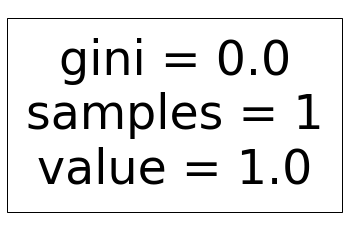

In [249]:
deployment(np.array([24.0, 0, 0, 1, 0, 0, 1, 1, 0]).reshape(1, -1), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.73892825 0.37655203]]
Predicción Árbol de Decisión: 1
Predicción VSM: 0
Predicción Probabilística Bayes: [0.75359864 0.24640136]
Predicción Final: 0
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

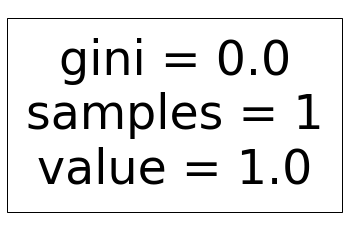

In [250]:
deployment(np.array([19.0, 0, 0, 1, 0, 1, 0, 0, 1]).reshape(1, -1), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.7622389  0.16500683]]
Predicción Árbol de Decisión: 1
Predicción VSM: 0
Predicción Probabilística Bayes: [0.92081274 0.07918726]
Predicción Final: 0
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

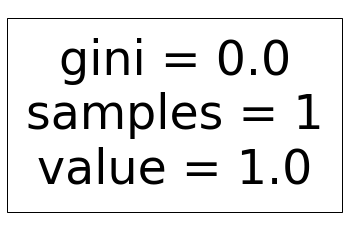

In [251]:
deployment(np.array([49.0, 0, 0, 1, 1, 0, 0, 0, 1]).reshape(1, -1).astype('float32'), np.array([0]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.7833813 0.1737249]]
Predicción Árbol de Decisión: 0
Predicción VSM: 0
Predicción Probabilística Bayes: [0.92343661 0.07656339]
Predicción Final: 0
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

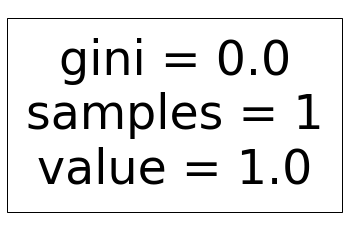

In [254]:
deployment(np.array([29.0, 0, 0, 1, 1, 0, 0, 0, 1]).reshape(1, -1).astype('float32'), np.array([0]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.68493986 0.9592475 ]]
Predicción Árbol de Decisión: 1
Predicción VSM: 1
Predicción Probabilística Bayes: [0.22106529 0.77893471]
Predicción Final: 1
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

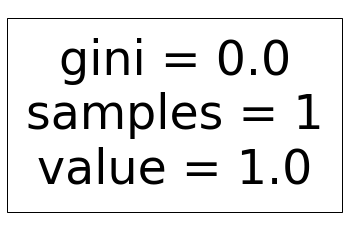

In [256]:
deployment(np.array([30.0, 0, 1, 0, 0, 1, 0, 1, 0]).reshape(1, -1).astype('float32'), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.81881875 0.48314488]]
Predicción Árbol de Decisión: 1
Predicción VSM: 1
Predicción Probabilística Bayes: [0.8361738 0.1638262]
Predicción Final: 0
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

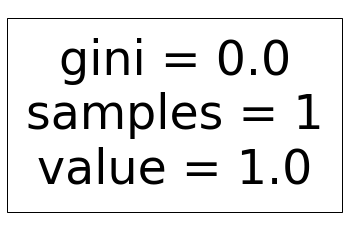

In [257]:
deployment(np.array([2.0, 0, 1, 0, 1, 0, 0, 0, 1]).reshape(1, -1).astype('float32'), np.array([0]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.71943814 0.7804823 ]]
Predicción Árbol de Decisión: 0
Predicción VSM: 1
Predicción Probabilística Bayes: [0.07622011 0.92377989]
Predicción Final: 1
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

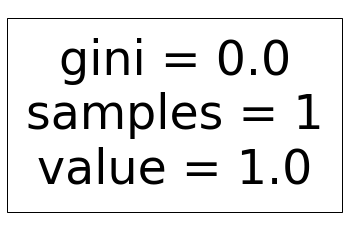

In [258]:
deployment(np.array([14.0, 1, 0, 0, 0, 1, 0, 1, 0]).reshape(1, -1).astype('float32'), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.40986216 0.12442652]]
Predicción Árbol de Decisión: 1
Predicción VSM: 0
Predicción Probabilística Bayes: [0.6994071 0.3005929]
Predicción Final: 0
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

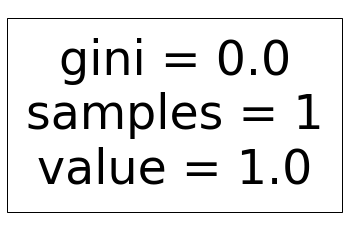

In [259]:
deployment(np.array([36.0, 0, 0, 1, 0, 0, 1, 0, 1]).reshape(1, -1).astype('float32'), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.65838313 0.8480396 ]]
Predicción Árbol de Decisión: 1
Predicción VSM: 1
Predicción Probabilística Bayes: [0.23687757 0.76312243]
Predicción Final: 1
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

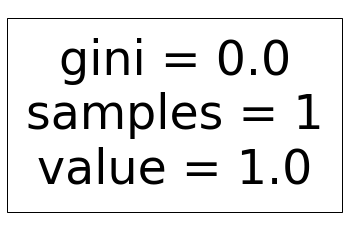

In [260]:
deployment(np.array([40.0, 0, 0, 1, 0, 1, 0, 1, 0]).reshape(1, -1).astype('float32'), np.array([1]))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicción Probabilística Regresión Logística: [[0.6770916  0.85354686]]
Predicción Árbol de Decisión: 1
Predicción VSM: 1
Predicción Probabilística Bayes: [0.22139896 0.77860104]
Predicción Final: 1
Árbol de Decisión


[Text(167.4, 108.72, 'gini = 0.0\nsamples = 1\nvalue = 1.0')]

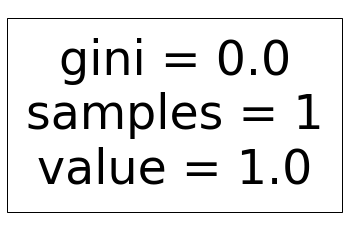

In [261]:
deployment(np.array([26.0, 0, 0, 1, 0, 1, 0, 1, 0]).reshape(1, -1).astype('float32'), np.array([0]))

## Árbol de Decisión 

[Text(223.20000000000002, 190.26, 'X[7] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(167.4, 135.9, 'X[0] <= 21.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

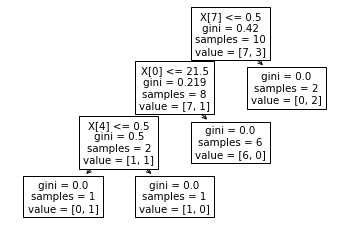

In [203]:
tree.plot_tree(joblib_model_tree.fit(np.array([[70.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.],
                                               [ 4.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
                                               [29.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
                                               [65.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.],
                                               [52.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.],
                                               [24.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.],
                                               [19.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.],
                                               [ 9.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.],
                                               [24.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.],
                                               [49.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.]]),
                                     np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0]).reshape(-1,1))) 